## 다음 데이터의 정규성을 검증하라

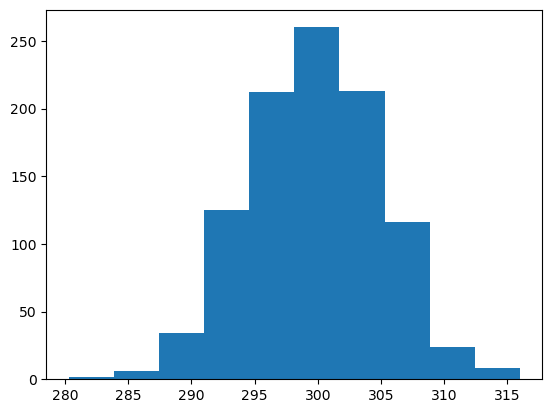

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal1.csv')
plt.hist(df)
plt.show()

In [3]:
from scipy.stats import shapiro
print(shapiro(df))

# 샤피로 검정시 p-value가 0.34이므로 유의수준 5%에서 귀무가설('데이터는 정규성을 가진다')을 기각할 수 없다.


ShapiroResult(statistic=0.9981444478034973, pvalue=0.34849318861961365)


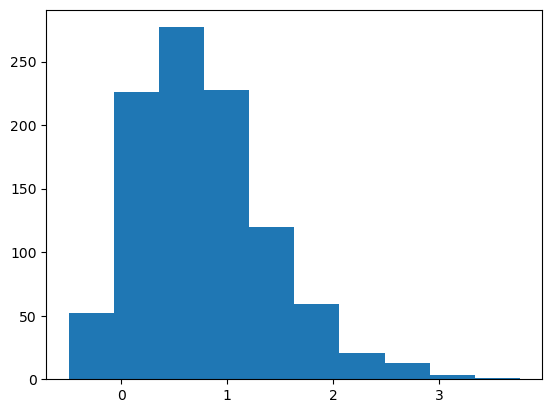

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal3.csv')
plt.hist(df)
plt.show()

In [2]:
from scipy.stats import shapiro
print(shapiro(df)
     )
#데이터는 정규성을 가지지 않는다.

ShapiroResult(statistic=0.9578885436058044, pvalue=2.309641794969743e-16)


### 위 데이터를 log 변환 한 후에 정규성을 가지는지 확인하라

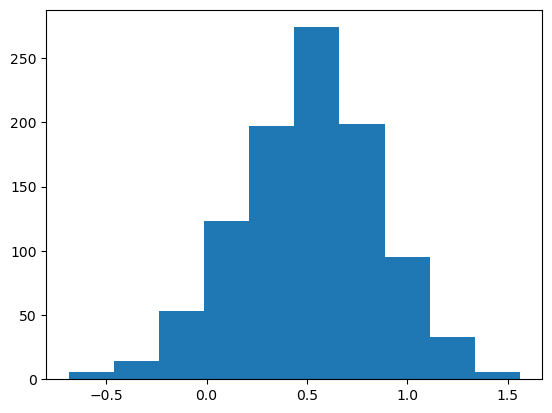

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal3.csv')
log_y_data = np.log1p(df)

plt.hist(log_y_data)
plt.show()

In [6]:
from scipy.stats import shapiro
print(shapiro(log_y_data))
#데이터는 정규성을 가진다
      

ShapiroResult(statistic=0.9976889491081238, pvalue=0.17540602385997772)


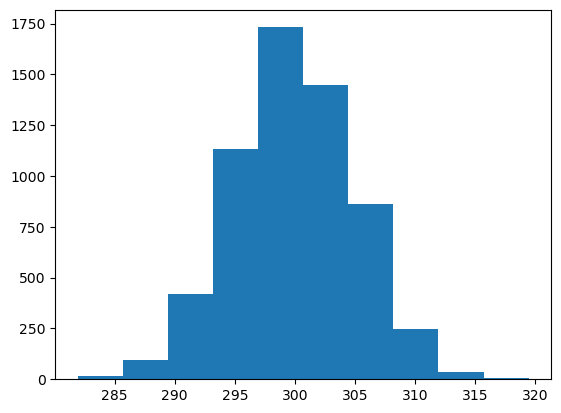

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal6.csv')
plt.hist(df)
plt.show()

In [10]:
from scipy.stats import shapiro

# print(shapiro(df))

# 5000개 초과 샘플에 대해서는 정확하지 않을 수 있음

from scipy.stats import anderson
print(anderson(df['data'].values))

AndersonResult(statistic=0.8266993530414766, critical_values=array([0.576, 0.656, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=299.95980319533163, scale=5.031806887885131)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


### 100명의 키 정보가 들어 있는 데이터가 있다. 데이터가 정규성을 만족하는지 확인하라.
### 그리고 평균키는 165라 판단할 수 있는지 귀무가설 대립가설을 설정한 후 유의수준 5%로 검정하라.

In [14]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/height1.csv')

from scipy.stats import ttest_1samp
from scipy.stats import shapiro
from scipy.stats import wilcoxon

#정규성 검정 샤피로
# print(shapiro(df))

statics, pvalue = shapiro(df)
# print(statics)
# print(pvalue)

print('샤피로 정규성 검정 p-value :', pvalue, '이므로')

if pvalue < 0.05 :
        print('귀무가설을 기각한다. 정규성을 만족하지 않음. 비모수 검정 진행. 윌콕슨 순위 부호 검정 진행. \n')
        print('윌콕슨 순위 부호 검정의 귀무가설은 "100명의 키의 평균은 165이다." 이며 대립가설은 "100명의 키의 평균은 165가 아니다." 이다.')
        #윌콕슨 부호순위 결정
        static, pvalue = wilcoxon(df['height']-165) 
        
        if pvalue < 0.05 :
            print(f'검정결과 pvalue는 {pvalue}로 결과는 귀무가설을 기각하고 대립가설을 채택한다.')
        else :
            print(f'검정결과 pvalue는 {pvalue}로 결과는 귀무가설을 기각하지 않는다.')
else :
    print('귀무가설을 기각하지 않는다. 정규성을 만족하므로 단일표본 검정으로 확인한다. \n')
    print('단일표본 t-test의 귀무가설은 "100명의 키의 평균은 165이다."이며 대립가설은 "100명의 키의 평균은 165가 아니다."이다.')
    
    #단일 표본 t 검정
    static, pvalue = ttest_1samp(df['height'],165)
    if pvalue <0.05 :
        print(f'검정결과 pvalue는 {pvalue}로 결과는 귀무가설을 기각하고 대립가설을 채택한다.')
    else : 
        print(f'검정결과 pvalue는 {pvalue}로 결과는 귀무가설을 기각하지 않는다.')
    

샤피로 정규성 검정 p-value : 0.4558176100254059 이므로
귀무가설을 기각하지 않는다. 정규성을 만족하므로 단일표본 검정으로 확인한다. 

단일표본 t-test의 귀무가설은 "100명의 키의 평균은 165이다."이며 대립가설은 "100명의 키의 평균은 165가 아니다."이다.
검정결과 pvalue는 0.0018367171548080209로 결과는 귀무가설을 기각하고 대립가설을 채택한다.


## 100명의 키 정보가 들어있는 데이터가 있다. 데이터가 정규성을 만족하는지 확인하라
### 그리고 평균키는 165라 판단할 수 있는지 귀무가설과 대립가설을 설정한 후 유의수준 5%로 검정하라.

In [19]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/height2.csv')

from scipy.stats import ttest_1samp
from scipy.stats import shapiro
from scipy.stats import wilcoxon

static, pvalue = shapiro(df)

print(pvalue)

print('샤피로 정규성 검정 p-value : ', pvalue, '이므로')

if pvalue < 0.05 :
    print('귀무가설 기각, 비모수 검정, 윌콕슨 순위부호검정')
    print('윌콕슨 순위부호검정의 귀무가설 100명의 키의 평균은 165, 대립가설은 아니다')
    
    static, pvalue = wilcoxon(df['height']-165)
    
    if pvalue <0.05 :
        print(f'검정결과 pvalue는 {pvalue}이므로 귀무가설 기각')
    else :
        print(f' 검정결과 pvalue는 {pvalue}이므로 귀무가설 기각 노')
else :
    print('귀무가설 기각노, 정규성 만족, 단일표본 검정으로 확인 \n')
    print('단일 표본 t-test의 귀무가설은 "100명 키의 평균으 165" , 대립가설은 아니다.')
    
    static, pvalue = ttest_1samp(df['height'],165)
    
    if pvalue <0.05 :
        print (f'검정결과 pvalue는 {pvalue}이므로 귀무가설을 기각하고 대립가설 채택')
    else :
        print (f'검정결과 pvalue는 {pvalue}이므로 귀무가설 기각하지 않는다.')

0.013552471995353699
샤피로 정규성 검정 p-value :  0.013552471995353699 이므로
귀무가설 기각, 비모수 검정, 윌콕슨 순위부호검정
윌콕슨 순위부호검정의 귀무가설 100명의 키의 평균은 165, 대립가설은 아니다
검정결과 pvalue는 0.04880534424649582이므로 귀무가설 기각


# 단일 표본 t검정
### 컬럼이 1개 , 평균이 몇인지 판단할 수 있는지
### 정규성 검정 : shapiro
### 귀무가설 채택(정규성 만족시) : ttest_1samp(칼럼,평균), 정규성만족x : wilcoxon(칼럼-평균)

In [5]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/height1.csv')
print(df)

#사피로 검정
from scipy.stats import shapiro
s , p = shapiro(df)
print(p)
print('정규성 만족')

from scipy.stats import ttest_1samp
#ttest_1samp(해당데이터, 평균)

st, pv = ttest_1samp(df['height'],165)
print(pv)
print('귀무가설 기각')

#만약 정규성을 만족하지 않는다면
#비모수 검정 진행, 윌콕슨 순위부호

#from scipy.stats import wilcoxon
# st, pv = wilcoxon(해당키 - 평균)
# pv >= 0.05 귀무가설 채택
# pv < 0.05 귀무가설 기각



        height
0   160.237691
1   164.747324
2   165.401628
3   168.801627
4   153.199021
..         ...
95  168.556633
96  172.935092
97  171.913052
98  181.381108
99  161.891018

[100 rows x 1 columns]
0.4558176100254059
정규성 만족
0.0018367171548080209
귀무가설 기각


In [9]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/height2.csv')
from scipy.stats import shapiro, ttest_1samp, wilcoxon

s , p = shapiro(df)
print(p)
print('정규성을 만족하지 않음')
# print(df)
st, pv = wilcoxon(df['height'] -165)
print(pv)
print('귀무가설 기각')

0.013552471995353699
정규성을 만족하지 않음
0.04880534424649582
귀무가설 기각


# 등분산 검정
## 컬럼이 2개
### bartlett , fligner, levene

In [16]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy2.csv')
df.head()

from scipy.stats import bartlett
from scipy.stats import fligner
from scipy.stats import levene

#각반의 점수만 따오기
a = df[df['class'] =='A'].score
b = df[df['class'] =='B'].score

print(bartlett(a,b))
print(fligner(a,b))
print(levene(a,b))

BartlettResult(statistic=0.26035880448930865, pvalue=0.609873758447687)
FlignerResult(statistic=0.7281251154135562, pvalue=0.39349158741002765)
LeveneResult(statistic=0.3145466542912649, pvalue=0.5751662820554713)


# 독립표본 검정 = 두 그룹의 평균은 동일하다 말할 수 있는가
### ttest_ind (정규성 만족시) -> ttest_ind(데프,데프,equal_val = ?) ? : 등분산 = True, 등분산x = False
### 정규성 만족 x : mannwhitneyu(컬럼1,컬럼2) 또는 ranksums(컬럼1,컬럼2)

In [24]:
import pandas as pd
df1 = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind1.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind2.csv')

from scipy.stats import shapiro
print(shapiro(df1))
print(shapiro(df2))
print('두개 다 정규성 만족')

from scipy.stats import levene
# print(df1)
print(levene(df1['data'],df2['data']))
print('등분산이다')

from scipy.stats import ttest_ind
print(ttest_ind(df1,df2,equal_var=True))
print('귀무가설 기각')

ShapiroResult(statistic=0.9860946536064148, pvalue=0.379673033952713)
ShapiroResult(statistic=0.990182638168335, pvalue=0.6793646216392517)
두개 다 정규성 만족
LeveneResult(statistic=2.5337683795339547, pvalue=0.11302904824469093)
등분산이다
Ttest_indResult(statistic=array([2.76719074]), pvalue=array([0.00619015]))
귀무가설 기각


In [31]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy5.csv')
print(df.isnull().sum())

from scipy.stats import shapiro
print(shapiro(df['A']))
print(shapiro(df['B'].dropna()))
print('정규성을 만족하지 않는다.')

#비모수 검정 실시

from scipy.stats import mannwhitneyu, ranksums

print(mannwhitneyu(df['A'],df['B'].dropna()))
print(ranksums(df['A'],df['B'].dropna()))
print('귀무가설 채택, 평균은 동일하다.')

A      0
B    120
dtype: int64
ShapiroResult(statistic=0.93753981590271, pvalue=6.175894240456614e-10)
ShapiroResult(statistic=0.9639433026313782, pvalue=0.00013568344002123922)
정규성을 만족하지 않는다.
MannwhitneyuResult(statistic=27036.0, pvalue=0.9807458376150018)
RanksumsResult(statistic=0.02446942170858557, pvalue=0.9804781743503561)
귀무가설 채택, 평균은 동일하다.


# 대응표본 t검정 (전후의 변화)

In [39]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel2.csv')
print(df.info())
print(df.isnull().sum())
#정규성 검정
before = df['before']
after = df['after']

from scipy.stats import shapiro
print(shapiro(before))
print(shapiro(after))
print('정규성 만족')

from scipy.stats import levene
print(levene(before,after))
print('등분산')

from scipy.stats import ttest_rel
print(ttest_rel(before,after))
print('귀무가설 기각, 전후 평균은 같지 않다.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   before  120 non-null    float64
 1   after   120 non-null    float64
dtypes: float64(2)
memory usage: 2.0 KB
None
before    0
after     0
dtype: int64
ShapiroResult(statistic=0.9907895922660828, pvalue=0.6065835952758789)
ShapiroResult(statistic=0.9916961193084717, pvalue=0.6923638582229614)
정규성 만족
LeveneResult(statistic=0.06427968690211128, pvalue=0.8000741651677987)
등분산
TtestResult(statistic=-2.5535473487670677, pvalue=0.011926744724546513, df=119)
귀무가설 기각, 전후 평균은 같지 않다.


In [45]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel3.csv')
# print(df.info())
# print(df.isnull().sum())

before = df['before']
after = df['after']

from scipy.stats import shapiro
print(shapiro(before))
print(shapiro(after))
print('정규성 만족')

from scipy.stats import levene
print(levene(before,after))
print('등분산')

from scipy.stats import ttest_rel
print(ttest_rel(before,after))
print('전후 평균은 같다')

ShapiroResult(statistic=0.9920631051063538, pvalue=0.7270199656486511)
ShapiroResult(statistic=0.992019534111023, pvalue=0.7229290008544922)
정규성 만족
LeveneResult(statistic=1.3463330638203617, pvalue=0.24708279045237214)
등분산
TtestResult(statistic=0.188900575991026, pvalue=0.8504925317234707, df=119)
전후 평균은 같다


In [47]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel1.csv')
# print(df.info())
# print(df.isnull().sum())

before = df['before']
after = df['after']

from scipy.stats import shapiro
print(shapiro(before))
print(shapiro(after))

ShapiroResult(statistic=0.9173730611801147, pvalue=0.0018974003614857793)
ShapiroResult(statistic=0.9448966979980469, pvalue=0.021140215918421745)


# 카이제곱 검정 (교차분석)

In [51]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/dice.csv')
print(df.info())

from scipy.stats import chisquare
df['expected'] = (df['counts'].sum()/6).astype('int')
display(df)

print(chisquare(df.counts,df.expected))
print('채택')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   dice_number  6 non-null      int64
 1   counts       6 non-null      int64
dtypes: int64(2)
memory usage: 224.0 bytes
None


,dice_number,counts,expected
0,1,24,24
1,2,20,24
2,3,28,24
3,4,22,24
4,5,28,24
5,6,22,24


Power_divergenceResult(statistic=2.333333333333333, pvalue=0.8013589222076911)
채택


In [59]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/hands2.csv')

print(df.info())

target = df.hands.value_counts().to_frame()
# print(target.info())
target['expected'] = [int(target.hands.sum()*0.8) , int(target.hands.sum()*0.2)]
# print(target)

from scipy.stats import chisquare
print(chisquare(target.hands,target.expected))
print('기각')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   hands   500 non-null    object
dtypes: object(1)
memory usage: 4.0+ KB
None
Power_divergenceResult(statistic=5.0, pvalue=0.025347318677468325)
기각


In [66]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/body/body.csv')
# print(df.info())
from scipy.stats import chi2_contingency
cdf = pd.crosstab(df['측정회원성별'], df['등급'])
print(chi2_contingency(cdf))
s , p, dof, expected = chi2_contingency(cdf)
print(p)
print('기각')
# 성별과 등급간 관련이 없음을 기각

Chi2ContingencyResult(statistic=120.06233631119409, pvalue=7.481892813401677e-26, dof=3, expected_freq=array([[1220.25, 1220.25, 1220.25, 1220.25],
       [2128.75, 2128.75, 2128.75, 2128.75]]))
7.481892813401677e-26
기각


In [67]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/fe2.csv',index_col=0)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 남성 to 총합
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   불참      3 non-null      int64
 1   참석      3 non-null      int64
 2   총합      3 non-null      int64
dtypes: int64(3)
memory usage: 96.0+ bytes
None


In [75]:
cdf = df.iloc[:2,:2]

from scipy.stats import chi2_contingency
print(chi2_contingency(cdf))
print('채택, 관련이 없다')

# 5보다 작은 셀이 20%가 넘으면 fisher)_exact 로 검정
from scipy.stats import fisher_exact
print(fisher_exact(cdf))
print('기각, 관련이 있다.')

Chi2ContingencyResult(statistic=3.277575757575758, pvalue=0.07023259819117404, dof=1, expected_freq=array([[1.875, 4.125],
       [3.125, 6.875]]))
채택, 관련이 없다
SignificanceResult(statistic=18.0, pvalue=0.03571428571428571)
기각, 관련이 있다.


# 2회 기출 변형

In [87]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/krdatacertificate/e2_p3_1.csv')
# print(df)

#height 평균값 출력

result1 = round(df.height.str.replace('cm','').astype('float64').mean()/100,5)
print(result1)

#단일표본 t검정 : ttest_1samp, 평균길이 30cm

from scipy.stats import ttest_1samp

df['h'] = df['height'].str.replace('cm','').astype('float64')

s , p = ttest_1samp(df['h'],30)
result2 = round(s,3)
print(result2)

result3 = round(p,3)
print(result3)
print('귀무')

0.29951
-0.217
0.829
귀무


# 3회 기출변형

In [116]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/krdatacertificate/e3_p3_1.csv')
# print(df.info())

def abc(x) :
    if x <= -3 :
        return 'A'
    elif x<= 0 :
        return 'B'
    else : return 'C'

df['전후'] = df['투약후']-df['투약전']

df['등급'] = df['전후'].map(abc)

result1 = df.loc[df['등급'] == 'A'].value_counts().sum()
print(result1)

from scipy.stats import chisquare
df1 = df['등급'].value_counts().sort_index().to_frame()
df1['expected'] = [(df1['등급'].sum()*0.5),(df1['등급'].sum()*0.25),(df1['등급'].sum()*0.25)]
# print(df1.sum())
# print(df['등급'].value_counts())
# print(dir(scipy.stats))

s , p = chisquare(df1['등급'] , df1['expected'])
result2 = round(s,3)
print(result2)

result3 = round(p,3)
print(result3)
print('귀무')

121
3.613
0.164
귀무


In [124]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/krdatacertificate/e3_p3_2_.csv')
print(df.head())

a = df[df.group == 'A'].rpm
b = df[df.group == 'B'].rpm

from scipy.stats import shapiro
a_s, a_p = shapiro(a)
b_s, b_p = shapiro(b)
print(a_p)
print(b_p)
print('정규성 만족')

from scipy.stats import levene

s , p = levene(a,b)
print(p)
print('등분산')

from scipy.stats import ttest_rel

s , p = ttest_rel(b,a, alternative = 'greater')
print(p)
print('대립가설')

     rpm group
0  163.6     A
1  246.9     A
2  234.9     A
3  156.9     A
4  226.6     A
0.397915244102478
0.9562925100326538
정규성 만족
0.9038351280607142
등분산
0.008927208346711192
대립가설


# 4회 기출

In [140]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/krdatacertificate/e4_p3_1_.csv')
df.head()
result1 = round(df.groupby('학과').size().mean(),3)
print(result1)

a = df['학과']
b = df['성별']

from scipy.stats import chi2_contingency

df2 = pd.crosstab(a,b)

s, p , dof, exp = chi2_contingency(df2)

result2 = round(s,3)
print(result2)

result3 = round(p,3)
print(result3)
print('귀무')

170.333
5.646
0.342
귀무
